### Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Carregando Dados

In [2]:
df_sf = pd.read_csv(r'D:\Projetos\UFABC\UFABC_Tambra\Dados\SoftFailure_dataset.csv')
df_hd = pd.read_csv(r'D:\Projetos\UFABC\UFABC_Tambra\Dados\HardFailure_dataset.csv')

### Preparação dos dados

#### Junção DFS

In [7]:
# Criando classiicação

df_sf['Base'] =  'SOFT'
df_hd['Base'] = 'HARD'

In [28]:
df_fail = pd.concat([df_sf, df_hd], ignore_index=True)

#### Conversão para datetime

In [29]:
df_fail['Timestamp_s'] = pd.to_datetime(df_fail.Timestamp,unit='s')#[[0]]
df_fail['Timestamp_data'] = df_fail['Timestamp_s'].astype(str).str.split(expand=True)[0]
df_fail['Timestamp_hora'] = df_fail['Timestamp_s'].astype(str).str.split(expand=True)[1]

#### Replice Failure - NaN = 0


In [30]:
df_fail.Failure = df_fail.Failure.replace(np.nan,0).astype(int)

### Interpolação - Tratamento de NaN nas Features Numéricas

In [31]:
# Para dados de série temporal, a interpolação é uma ótima estratégia.
# Ela preenche os valores ausentes com base nos valores vizinhos.
# Primeiro, vamos ordenar o DataFrame pelo tempo para garantir que a interpolação funcione corretamente.
df_fail = df_fail.sort_values(by='Timestamp').reset_index(drop=True)

In [32]:
#### O pandas pode preencher os valores ausentes estimando o que eles deveriam ser com base nos valores vizinhos (anteriores e posteriores).

features_numericas = ['BER', 'OSNR', 'InputPower', 'OutputPower']
df_fail[features_numericas] = df_fail[features_numericas].interpolate(method='linear')

In [33]:
df_fail.InputPower = df_fail.InputPower.replace(np.nan,0)
df_fail.OutputPower = df_fail.OutputPower.replace(np.nan,0)

### Exploração dos dados

In [37]:
df_fail

,Timestamp,Type,ID,BER,OSNR,InputPower,OutputPower,Failure,Timestamp_s,Timestamp_data,Timestamp_hora,Base
0,1623394634,Devices,SPO1/18/11,2.280000e-08,38.500000,0.00,0.00,0,2021-06-11 06:57:14,2021-06-11,06:57:14,HARD
1,1623394635,Devices,SPO2/18/11,8.730000e-07,23.500000,0.00,0.00,0,2021-06-11 06:57:15,2021-06-11,06:57:15,HARD
2,1623394635,Infrastructure,Ampli4,7.303667e-07,26.016667,-22.90,0.70,0,2021-06-11 06:57:15,2021-06-11,06:57:15,HARD
3,1623394635,Infrastructure,Ampli3,5.877333e-07,28.533333,-16.70,0.80,0,2021-06-11 06:57:15,2021-06-11,06:57:15,HARD
4,1623394635,Infrastructure,Ampli2,4.451000e-07,31.050000,-15.50,0.40,0,2021-06-11 06:57:15,2021-06-11,06:57:15,HARD
...,...,...,...,...,...,...,...,...,...,...,...,...
119425,1624486451,Infrastructure,Ampli4,7.306667e-08,34.300000,-22.90,0.70,0,2021-06-23 22:14:11,2021-06-23,22:14:11,SOFT
119426,1624486451,Infrastructure,Ampli1,1.215333e-07,30.000000,-19.20,0.70,0,2021-06-23 22:14:11,2021-06-23,22:14:11,SOFT
119427,1624486451,Devices,SPO2/18/11,1.700000e-07,25.700000,-17.95,0.75,0,2021-06-23 22:14:11,2021-06-23,22:14:11,SOFT
119428,1624486451,Infrastructure,Ampli3,1.700000e-07,25.700000,-16.70,0.80,0,2021-06-23 22:14:11,2021-06-23,22:14:11,SOFT


In [38]:
df_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119430 entries, 0 to 119429
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       119430 non-null  int64         
 1   Type            119430 non-null  object        
 2   ID              119430 non-null  object        
 3   BER             119430 non-null  float64       
 4   OSNR            119430 non-null  float64       
 5   InputPower      119430 non-null  float64       
 6   OutputPower     119430 non-null  float64       
 7   Failure         119430 non-null  int64         
 8   Timestamp_s     119430 non-null  datetime64[ns]
 9   Timestamp_data  119430 non-null  object        
 10  Timestamp_hora  119430 non-null  object        
 11  Base            119430 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 10.9+ MB


In [39]:
df_fail.describe()

,Timestamp,BER,OSNR,InputPower,OutputPower,Failure,Timestamp_s
count,1.194300e+05,1.194300e+05,119430.000000,119430.000000,119430.000000,119430.000000,119430
mean,1.623889e+09,1.846473e-04,30.590290,-19.582524,0.648359,0.063728,2021-06-17 00:14:02.432923136
min,1.623395e+09,0.000000e+00,0.000000,-38.000000,0.000000,0.000000,2021-06-11 06:57:14
25%,1.623411e+09,2.370000e-08,25.400000,-22.900000,0.550000,0.000000,2021-06-11 11:24:37
50%,1.623427e+09,1.747500e-07,31.000000,-19.200000,0.700000,0.000000,2021-06-11 15:58:39
75%,1.624470e+09,6.166938e-07,38.500000,-16.700000,0.700000,0.000000,2021-06-23 17:46:46
max,1.624486e+09,2.651316e-02,38.600000,0.000000,0.900000,1.000000,2021-06-23 22:14:11
std,5.271721e+05,1.212574e-03,6.921175,3.740281,0.132266,0.244268,NaN


In [41]:
df_fail.Type.unique()

array(['Devices', 'Infrastructure'], dtype=object)

In [45]:
df_fail.ID.unique()

array(['SPO1/18/11', 'SPO2/18/11', 'Ampli4', 'Ampli3', 'Ampli2', 'Ampli1'],
      dtype=object)

In [40]:
df_fail.corr(numeric_only=True)

,Timestamp,BER,OSNR,InputPower,OutputPower,Failure
Timestamp,1.000000,-0.129228,0.131924,0.139648,0.015441,0.121965
BER,-0.129228,1.000000,-0.260976,-0.064315,-0.016382,-0.020029
OSNR,0.131924,-0.260976,1.000000,0.059078,-0.004025,-0.132893
InputPower,0.139648,-0.064315,0.059078,1.000000,-0.395968,-0.154167
OutputPower,0.015441,-0.016382,-0.004025,-0.395968,1.000000,-0.041835
Failure,0.121965,-0.020029,-0.132893,-0.154167,-0.041835,1.000000


<Axes: >

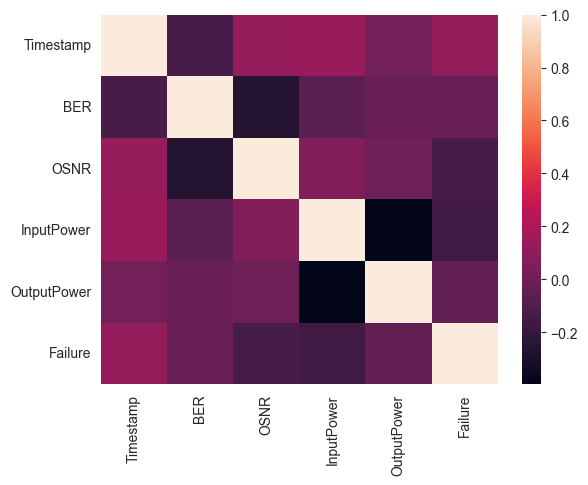

In [42]:
sns.heatmap(df_fail.corr(numeric_only=True))

### MACHINE LEARNING